In [57]:
%matplotlib inline
from IPython.display import set_matplotlib_formats, display, HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

### Installation
Install the OpenML developer version  
`pip install openml' coming up (october 2017)

## Authentication

* You need to authenticate to upload datasets, experiments,... to the server
* Create an OpenML account (free) on http://www.openml.org. 
* After logging in, open your account page (avatar on the top right)
* Open 'Account Settings', then 'API authentication' to find your API key.

There are two ways to authenticate:  

* Create a plain text file `~/.openml/config` with the line 'apikey=MYKEY', replacing MYKEY with your API key.
* Run the code below, replacing 'YOURKEY' with your API key.

In [28]:
# Uncomment and set your OpenML key. Don't share your key with others.
import openml as oml
#oml.config.apikey = 'YOURKEY'

# It all starts with data
Explore thousands of datasets, or share your own

### List datasets
`datasets.list_datasets()` returns a dictionary with information about all OpenML datasets

In [29]:
import openml as oml
openml_list = oml.datasets.list_datasets() # Returns a dict

# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[['did','name','NumberOfInstances',
               'NumberOfFeatures','NumberOfClasses']]
print("First 10 of %s datasets..." % len(datalist))
datalist[:10]

First 10 of 127 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1,1,anneal,898,39,5
2,2,kr-vs-kp,3196,37,2
3,3,letter,20000,17,26
4,4,balance-scale,625,5,3
5,5,mfeat-factors,2000,217,10
6,6,mfeat-fourier,2000,77,10
7,7,breast-w,699,10,2
8,8,mfeat-karhunen,2000,65,10
9,9,mfeat-morphological,2000,7,10
10,10,mfeat-pixel,2000,241,10


### Exercise
- Find datasets with more than 10000 examples
- Find a dataset called 'eeg-eye-state'
- Find all datasets with more than 50 classes

In [30]:
datalist[datalist.NumberOfInstances>10000
        ].sort(['NumberOfInstances'])[:20]

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
61,61,artificial-characters,10218,8,10
71,71,har,10299,562,6
51,51,jm1,10885,22,2
18,18,pendigits,10992,17,10
92,92,PhishingWebsites,11055,31,2
70,70,gas-drift,13910,129,6
45,45,sylva_agnostic,14395,217,2
68,68,eeg-eye-state,14980,15,2
115,115,pol,15000,49,11
48,48,mozilla4,15545,6,2


In [31]:
datalist.query('name == "eeg-eye-state"')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
68,68,eeg-eye-state,14980,15,2


In [32]:
datalist.query('NumberOfClasses > 50')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
78,78,one-hundred-plants-margin,1600,65,100
79,79,one-hundred-plants-shape,1600,65,100
80,80,one-hundred-plants-texture,1599,65,100
103,103,kin8nm,8192,9,8191
104,104,mbagrade,61,3,57
105,105,wisconsin,194,33,94
109,109,auto_price,159,16,145
110,110,autoMpg,398,8,129
111,111,cpu_act,8192,22,56
114,114,pbc,418,19,399


## Download datasets
This is done based on the dataset ID ('did').

In [33]:
dataset = oml.datasets.get_dataset(1471)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://www.openml.org/data/v1/download/1587924/eeg-eye-state.ARFF
**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after


Get the actual data.  
Returned as numpy array, with meta-info (e.g. target feature, feature names,...)

In [34]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, 
    return_attribute_names=True)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg['class'] = y
print(eeg[:10])

            V1           V2           V3           V4           V5  \
0  4329.229980  4009.229980  4289.229980  4148.209961  4350.259766   
1  4324.620117  4004.620117  4293.850098  4148.720215  4342.049805   
2  4327.689941  4006.669922  4295.379883  4156.410156  4336.919922   
3  4328.720215  4011.790039  4296.410156  4155.899902  4343.589844   
4  4326.149902  4011.790039  4292.310059  4151.279785  4347.689941   
5  4321.029785  4004.620117  4284.100098  4153.330078  4345.640137   
6  4319.490234  4001.030029  4280.509766  4151.790039  4343.589844   
7  4325.640137  4006.669922  4278.459961  4143.080078  4344.100098   
8  4326.149902  4010.770020  4276.410156  4139.490234  4345.129883   
9  4326.149902  4011.280029  4276.919922  4142.049805  4344.100098   

            V6           V7           V8           V9          V10  \
0  4586.149902  4096.919922  4641.029785  4222.049805  4238.459961   
1  4586.669922  4097.439941  4638.970215  4210.770020  4226.669922   
2  4583.589844  409

## Train machine learning models
Exercise: Train a scikit-learn model (e.g. `KNeighborsClassifier`) on the data manually

In [35]:
from sklearn import neighbors
dataset = oml.datasets.get_dataset(1471)
X, y = dataset.get_data(target=dataset.default_target_attribute)

In [36]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

You can also ask for meta-data to automatically preprocess the data
- e.g. categorical features -> do feature encoding

In [37]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

Categorical features: [True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Upload datasets
* Option 1: Via web upload form on www.openml.org
    * Requires conversion to ARFF data format
    * See the `csv2arff.py` script to convert CSV to ARFF
* Option 2: Upload programmatically:

In [38]:
# Switch to test serve to avoid uploading datasets to the main server by accident
# Uncomment or set to main server when everthing looks good
oml.config.server = 'https://test.openml.org/api/v1'
my_data = oml.datasets.OpenMLDataset(data_file='data/ram_price.arff', name='RAM_Price', description='This is a test.',
                                     version='1', tag='test', format='ARFF', licence='Public', visibility='public', 
                                     default_target_attribute='price', dataset_id='1')
response = my_data.publish()
print("Uploaded to http://test.openml.org/d/" + str(response.dataset_id))

Uploaded to http://test.openml.org/d/1266


In [39]:
# Return to main server
oml.config.server = 'https://www.openml.org/api/v1'

# Tasks: set your own goals
and invite others to work on the same problem  

* Option 1: Via task creation form ion your dataset's page
    * Click `Define a new task`
    * Choose task type (e.g. classification)
    * Set required inputs
* Option 2: Programmatically
    * Will be available soon

## Listing tasks

In [40]:
task_list = oml.tasks.list_tasks(size=5000) # Get first 5000 tasks

mytasks = pd.DataFrame(task_list).transpose()
mytasks = mytasks[['tid','did','name','task_type','estimation_procedure','evaluation_measures']]
#print(mytasks.columns)
print("First 5 of %s tasks:" % len(mytasks))
print(mytasks.head())

First 5 of 5000 tasks:
  tid did        name                  task_type     estimation_procedure  \
2   2   2      anneal  Supervised Classification  10-fold Crossvalidation   
3   3   3    kr-vs-kp  Supervised Classification  10-fold Crossvalidation   
4   4   4       labor  Supervised Classification  10-fold Crossvalidation   
5   5   5  arrhythmia  Supervised Classification  10-fold Crossvalidation   
6   6   6      letter  Supervised Classification  10-fold Crossvalidation   

   evaluation_measures  
2  predictive_accuracy  
3  predictive_accuracy  
4  predictive_accuracy  
5  predictive_accuracy  
6  predictive_accuracy  


### Exercise
Search for the tasks on the 'eeg-eye-state' dataset

In [48]:
print(mytasks.query('name=="eeg-eye-state"'))

         tid   did           name                  task_type  \
9983    9983  1471  eeg-eye-state  Supervised Classification   
14951  14951  1471  eeg-eye-state  Supervised Classification   

          estimation_procedure  evaluation_measures  
9983   10-fold Crossvalidation  predictive_accuracy  
14951  10-fold Crossvalidation                  NaN  


## Download tasks

In [49]:
from pprint import pprint
task = oml.tasks.get_task(3954)
pprint(vars(task))

{'class_labels': ['g', 'h'],
 'cost_matrix': None,
 'dataset_id': 1120,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/3954/Task_3954_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': 'predictive_accuracy',
 'split': None,
 'target_name': 'class:',
 'task_id': 3954,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Runs: Easily explore models by running them on tasks
We can run (many) scikit-learn algorithms on (many) OpenML tasks.

In [43]:
from sklearn import ensemble

# Get a task
task = oml.tasks.get_task(3954)

# Build any classifier or pipeline
clf = ensemble.RandomForestClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)

Share the run on the OpenML server

In [44]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/7932216


### It also works with pipelines
When you need to handle 'dirty' data, build pipelines to model then automatically

In [59]:
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer(strategy='median')),
            ('OneHotEncoder', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)

run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/7932221


## Download previous results
You can download all your results anytime, as well as everybody else's

200


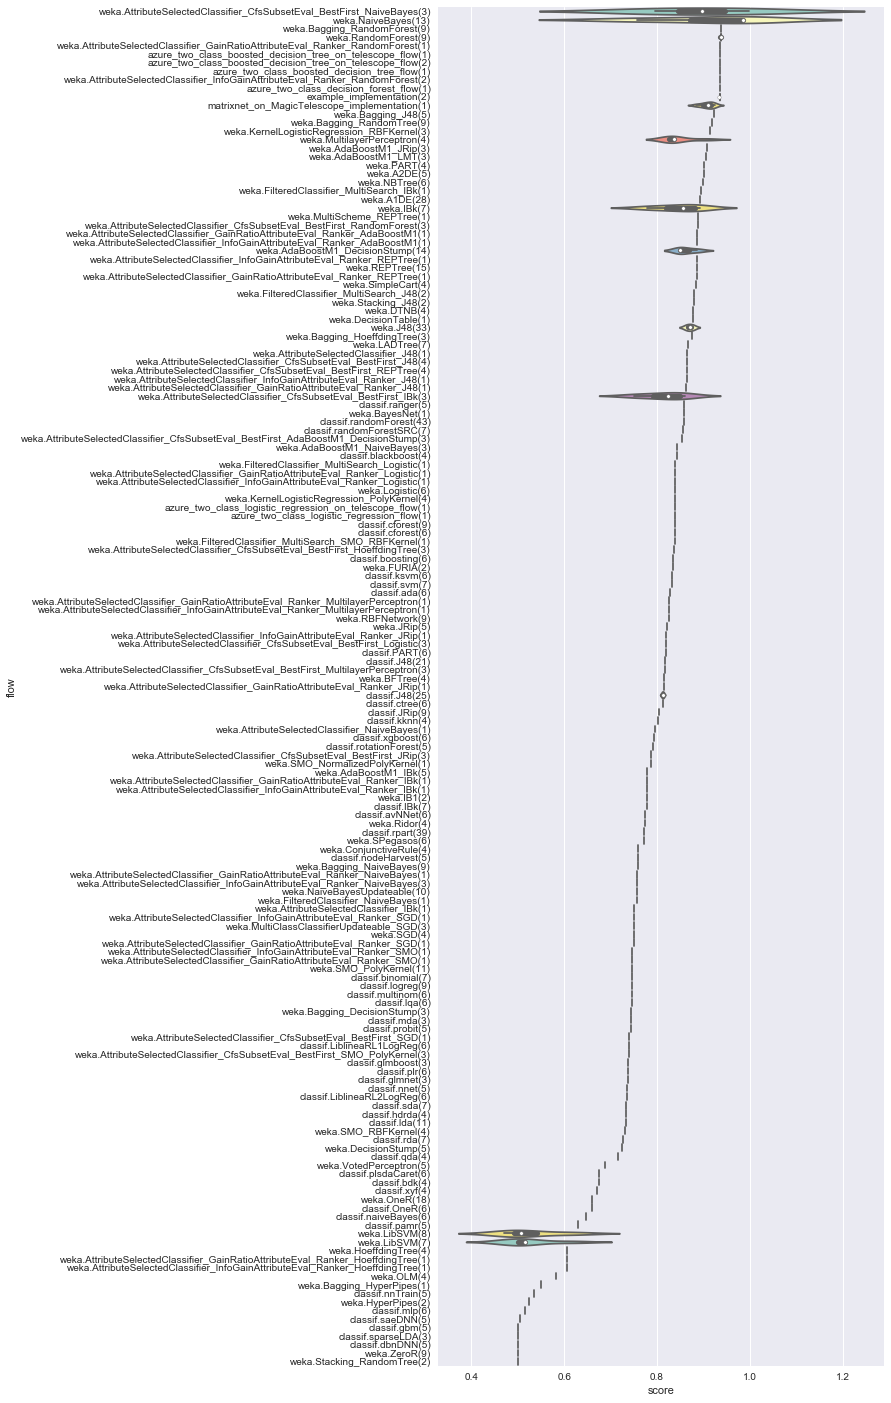

In [60]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot
from openml import evaluations

# Get the list of runs for task 3954
evaluations = oml.evaluations.list_evaluations(task=[3954], function='area_under_roc_curve', size=200)
print(len(evaluations))
# Download the tasks and plot the scores
scores = []
for id, e in evaluations.items():
    scores.append({"flow":e.flow_name, "score":e.value})
    
sorted_score = sorted(scores, key=lambda x: -x["score"])
fig, ax = pyplot.subplots(figsize=(8, 25))    
sns.violinplot(ax=ax, x="score", y="flow", data=pd.DataFrame(sorted_score), scale="width", palette="Set3");

Easy benchmarking:

In [47]:
import openml as oml
from sklearn import neighbors

for task_id in [14951,10103]:
    task = oml.tasks.get_task(task_id)
    data = oml.datasets.get_dataset(task.dataset_id)
    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    flow = oml.flows.sklearn_to_flow(clf)
    
    try:
        run = oml.runs.run_flow_on_task(task, flow)
        myrun = run.publish()
        print("kNN on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))
    except oml.exceptions.PyOpenMLError as err:
        print("OpenML: {0}".format(err))

kNN on eeg-eye-state: http://www.openml.org/r/7932218
kNN on volcanoes-a1: http://www.openml.org/r/7932219


## A Challenge
Try to build the best possible models on several OpenML tasks, and compare your results with the rest of the class, and learn from them. Some tasks you could try (or browse openml.org):

* EEG eye state: data_id:[1471](http://www.openml.org/d/1471), task_id:[14951](http://www.openml.org/t/14951)
* Volcanoes on Venus: data_id:[1527](http://www.openml.org/d/1527), task_id:[10103](http://www.openml.org/t/10103)
* Walking activity: data_id:[1509](http://www.openml.org/d/1509), task_id: [9945](http://www.openml.org/t/9945), 150k instances
* Covertype (Satellite): data_id:[150](http://www.openml.org/d/150), task_id: [218](http://www.openml.org/t/218). 500k instances
* Higgs (Physics): data_id:[23512](http://www.openml.org/d/23512), task_id:[52950](http://www.openml.org/t/52950). 100k instances, missing values

* Your own uploaded dataset